# Спрос на рейсы авиакомпании

В данной задаче нам понять предпочтения пользователей, покупающих билеты на разные направления,  изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У нас есть файлы со следующими данными:

**query_1.csv** — в нём содержится информация:

- *model* — модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов (*model*) в сентябре 2018 года.

**query_3.csv** — в нём содержится информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

In [1]:
#Импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats as st

In [2]:
#Загрузим таблицы
query_1 = pd.read_csv('C:/Users/k.kovalenko/Documents/Data Science/datasets/query_1.csv')
query_3 = pd.read_csv('C:/Users/k.kovalenko/Documents/Data Science/datasets/query_3.csv')

In [3]:
#Изучим таблицы
display(query_1)
display(query_3)

display(query_1.info())
display(query_3.info())

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

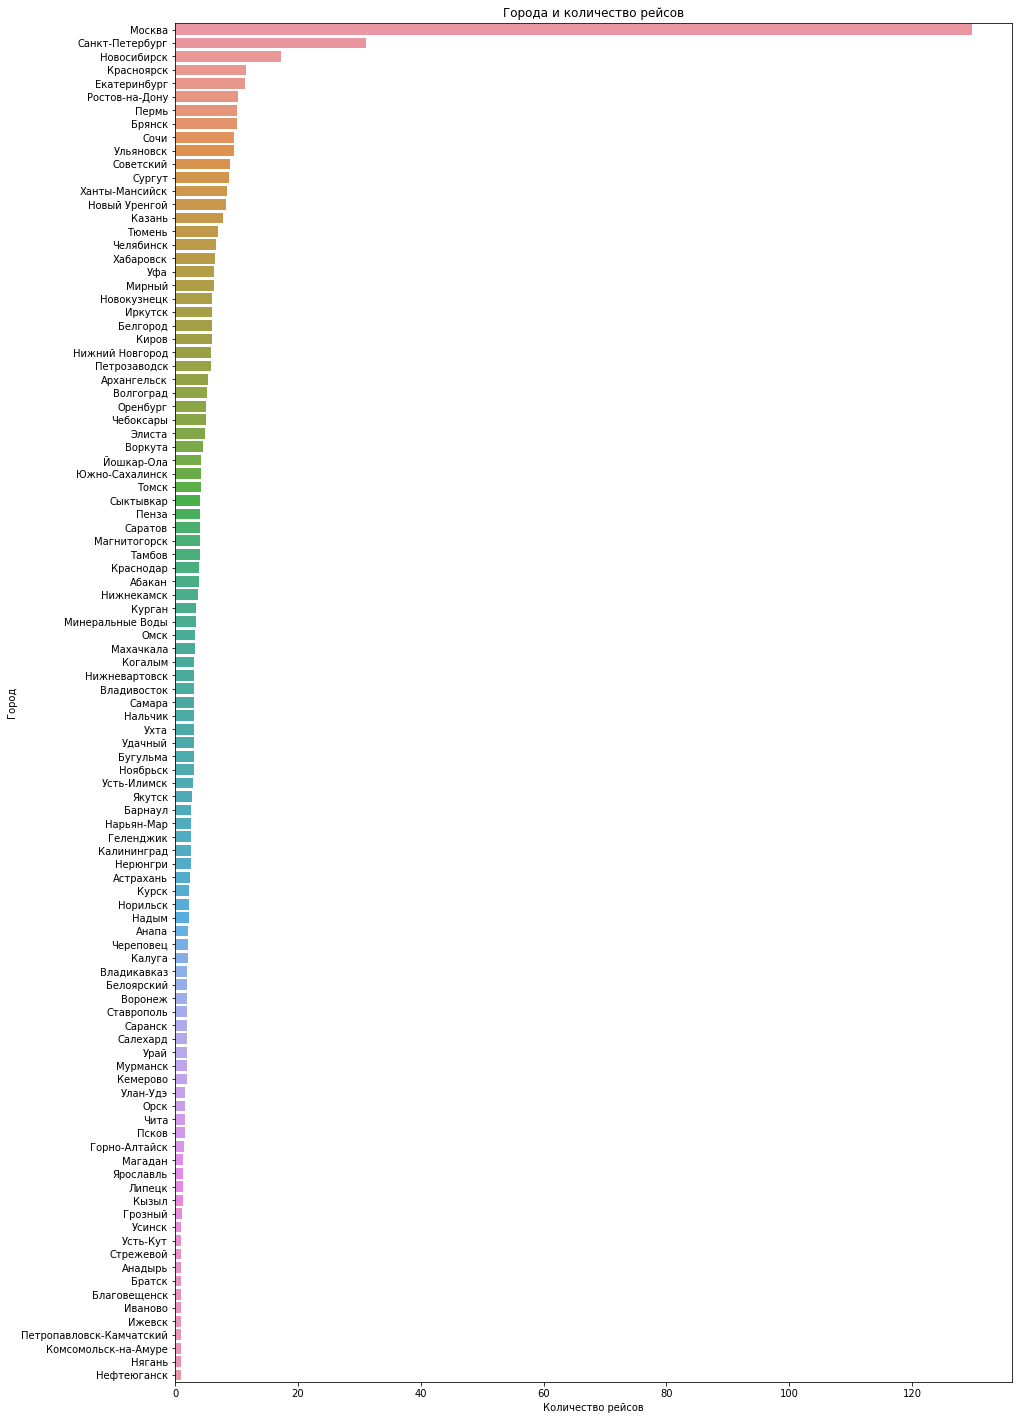

In [10]:
# Построим диаграмму по среднему количеству прибывающих рейсов в день в сентябре 2018 года в разных городах
plt.figure(figsize=(15,25))
sns.barplot(x='average_flights', y='city',
            data=query_3.sort_values(by='average_flights', ascending=False))
plt.title('Города и количество рейсов')
plt.xlabel('Количество рейсов')
plt.ylabel('Город');

**Вывод**

По среднему количеству прибывающих рейсов в день в сентябре 2018 года с огромным отрывом лидирует Москва, на втором месте - Санкт-Петербург, замыкает тройку лидеров город Новосибирск.

In [4]:
# Найдем топ 10 городов по среднему количеству прибывающих рейсов в день в сентябре 2018 года
data=query_3.sort_values(by='average_flights', ascending=False).nlargest(columns=['average_flights'], n=10)
display(data)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


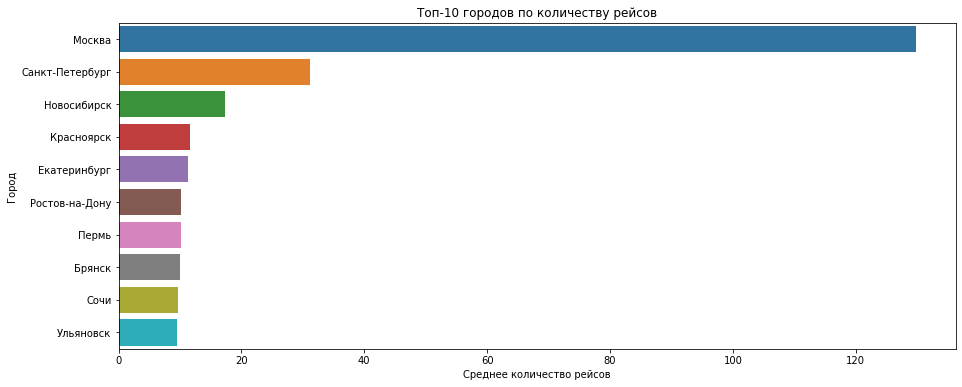

In [12]:
# Построим диаграмму по среднему количеству прибывающих рейсов в день в сентябре 2018 года в топ-10 городах
plt.figure(figsize=(15,6))
sns.barplot(x='average_flights', y='city',
            data=query_3.sort_values(by='average_flights', ascending=False).nlargest(columns=['average_flights'], n=10))
plt.title('Топ-10 городов по количеству рейсов')
plt.xlabel('Среднее количество рейсов')
plt.ylabel('Город');

**Вывод**

Выбирая только первые 10 городов, можно наглядно проиллюстрировать, что без тройки лидеров оставшиеся 7 городов в сентябре 2018 года принимали, примерно, одинаковое количество рейсов.

Text(0, 0.5, 'Модель самолета')

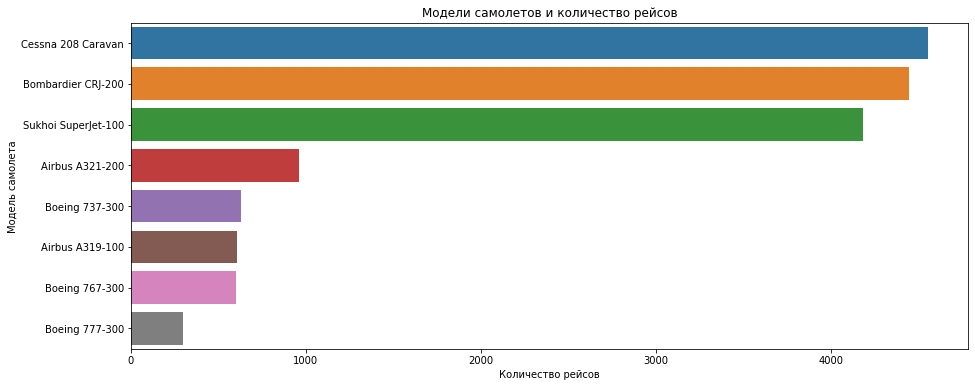

In [5]:
# Построим диаграмму количества рейсов, совершаемых разными типами самолетов, в сентябре 2018 года
plt.figure(figsize=(15,6))
sns.barplot(x='flights_amount', y='model',
            data=query_1.sort_values(by='flights_amount', ascending=False))
plt.title('Модели самолетов и количество рейсов')
plt.xlabel('Количество рейсов')
plt.ylabel('Модель самолета')

**Вывод**

Мы видим, что больше всего рейсов в сентябре 2018 года совершалось тремя видами самолетов небольшой вместимости. Вместе взятые вместительные пассажирские самолеты выполняют количество рейсов, примерно, как один из трех типов небольших самолетов.

**Общий вывод**

Мы определили, что наибольшее количество рейсов в сентябре 2018 года совершалось тремя видами самолетов небольшой вместимости, при этом абсолютным лидером по количеству прибывающих рейсов в день в сентябре 2018 года является Москва, которая принимает больше вместительных пассажирских авиалайнеров. Такой результат получен, скорее всего, за счет значительного количества рейсов в региональных аэропортах, выполняемых небольшими самолетами на регональных и межрегиональных маршрутах.